In [4]:
%load_ext autoreload
%autoreload 2
import torch as t
import matplotlib.pyplot as plt
from gninvert.functions import sort_with
from gninvert.graph_compare import model_compare
from gninvert.rule_discovery import *
from gninvert.hyperparamsearch import get_hyperparam_dtree, view_hp_results_graph, hp_stats
from gninvert.dtree import decision_tree_paths
from gninvert.gns import RecoveredGN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Paper settings

## diff1

Stats for 20 steps for node features:
Greatest relative difference: 124.12710189819336%
Average relative difference: 114.57712709903718%
Smallest relative difference: 100.15145540237427%
Greatest absolute difference: 0.14610964059829712
Average absolute difference: 0.08985075503587722
Smallest absolute difference: 0.0008235573768615723%


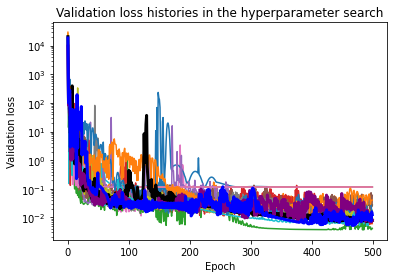

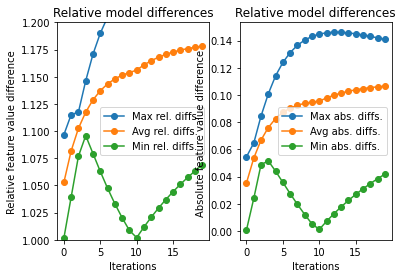

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


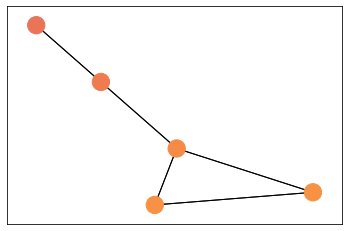

tensor([[0.7394],
        [0.7394],
        [0.7224],
        [0.6795],
        [0.6493]])
The ground truth model finished the run outputting this graph:


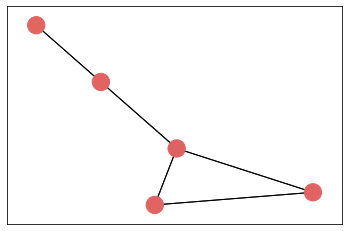

tensor([[0.5986],
        [0.5986],
        [0.5930],
        [0.6000],
        [0.6075]], grad_fn=<AddmmBackward0>)
{'message_sr_result': complexity                                   5
loss                                  0.059278
score                                 0.767715
equation        ((xs * -2.6309328) + 1.650251)
sympy_format           1.650251 - 2.6309328*xs
Name: 2, dtype: object, 'update_sr_result': complexity                                     5
loss                                    0.000389
score                                   1.543834
equation        ((a * 0.67616796) - -0.18268661)
sympy_format           0.67616796*a + 0.18268661
Name: 2, dtype: object, 'message_variable_order': [xt, xs], 'update_variable_order': [xt, a], 'data_trained_on': <gninvert.data_generation.TrainingData, 6 train size / 2 validation size / shuffle True>}


In [3]:
gn1, hps1, model1, sr1 = view_run_results('runs/PAPER_diff1')

In [9]:
hp_stats(hps1, gn1)

{'final_val_loss': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.9, 0.999),
   'epochs': 500,
   1: 1,
   2: 1,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 0.00416335416957736},
 'prediction_error': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.7, 0.97),
   'epochs': 500,
   1: 1,
   2: 1,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 0.09170669913291932}}

## diff2

Stats for 20 steps for node features:
Greatest relative difference: 258.5620641708374%
Average relative difference: 136.57970070838928%
Smallest relative difference: 100.09912252426147%
Greatest absolute difference: 0.4723726511001587
Average absolute difference: 0.16843891628086566
Smallest absolute difference: 0.00042182207107543945%


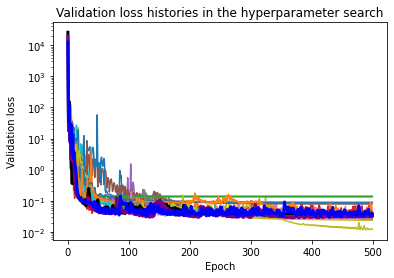

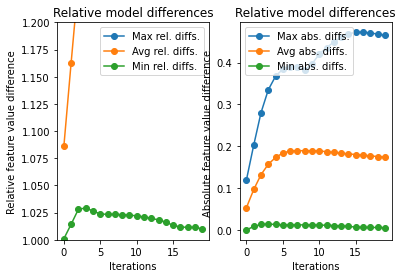

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


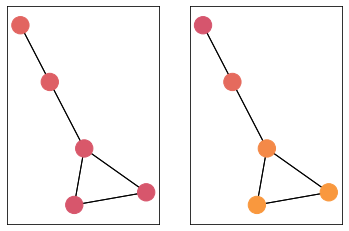

tensor([[0.5514, 0.7589],
        [0.5511, 0.7589],
        [0.5601, 0.7187],
        [0.5848, 0.6177],
        [0.6055, 0.5478]])
The ground truth model finished the run outputting this graph:


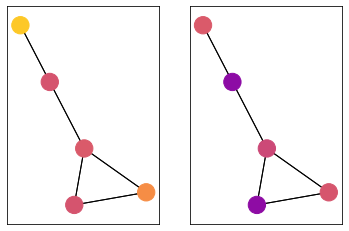

tensor([[0.7274, 0.5470],
        [0.5444, 0.2941],
        [0.5658, 0.5044],
        [0.5431, 0.2930],
        [0.8848, 0.5642]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                     1
loss                         NaN
score                        0.0
equation               14.854478
sympy_format    14.8544780000000
Name: 0, dtype: object, complexity                        1
loss                            0.0
score                           0.0
equation                  -0.051855
sympy_format    -0.0518554500000000
Name: 0, dtype: object], 'update_sr_result': [complexity                                       7
loss                                      0.190139
score                                     0.461045
equation         (((xt1 - a1) * -2.4951134) - xt2)
sympy_format    2.4951134*a1 - 2.4951134*xt1 - xt2
Name: 3, dtype: object, complexity                                                    11
loss                                                    0.047

In [10]:
gn2, hps2, model2, sr2 = view_run_results('runs/PAPER_diff2')

In [14]:
hp_stats(hps2, gn2)

{'final_val_loss': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.7, 0.97),
   'epochs': 500,
   1: 2,
   2: 2,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 0.012430821545422077},
 'prediction_error': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.7, 0.97),
   'epochs': 500,
   1: 2,
   2: 2,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 0.11651797443628312}}

## act_inh_simple

Stats for 20 steps for node features:
Greatest relative difference: 357.97226428985596%
Average relative difference: 123.81296396255492%
Smallest relative difference: 100.13782978057861%
Greatest absolute difference: 0.25811538100242615
Average absolute difference: 0.10289997151121497
Smallest absolute difference: 0.0013071894645690918%


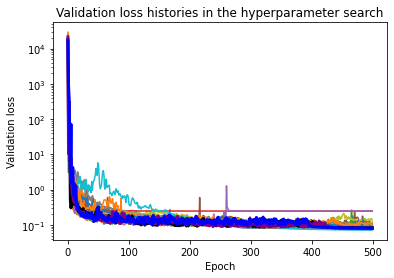

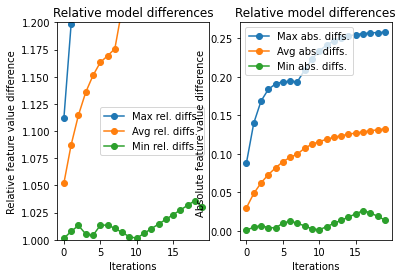

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


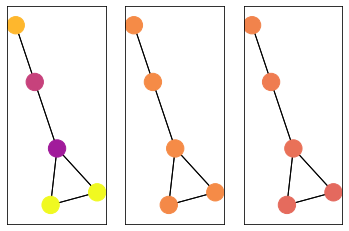

tensor([[1.0862, 0.7191, 0.6156],
        [1.0024, 0.7187, 0.6241],
        [0.3478, 0.7203, 0.6425],
        [0.4842, 0.7222, 0.6790],
        [0.8434, 0.7212, 0.6980]])
The ground truth model finished the run outputting this graph:


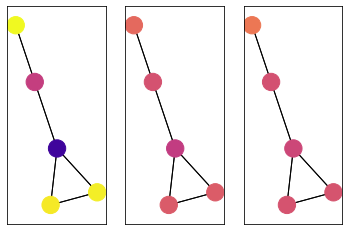

tensor([[0.9765, 0.5711, 0.5458],
        [0.9635, 0.5670, 0.5398],
        [0.0971, 0.4621, 0.5019],
        [0.4699, 0.5384, 0.5330],
        [1.0946, 0.6142, 0.6640]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                       1
loss                           0.0
score                          0.0
equation                 -0.137347
sympy_format    -0.137347010000000
Name: 0, dtype: object, complexity                        1
loss                            0.0
score                           0.0
equation                  -0.018358
sympy_format    -0.0183582120000000
Name: 0, dtype: object], 'update_sr_result': [complexity                       3
loss                      0.861248
score                     0.426507
equation        (xt2 * -3.4968727)
sympy_format        -3.4968727*xt2
Name: 1, dtype: object, complexity               3
loss              0.094009
score             0.629874
equation        (a2 - xt2)
sympy_format      a2 - xt2
Name: 1, dtype: objec

In [16]:
gn_as, hps_as, model_as, sr_as = view_run_results('runs/PAPER_act_inh_simple')

In [17]:
hp_stats(hps_as, gn_as)

{'final_val_loss': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.85, 0.985),
   'epochs': 500,
   1: 3,
   2: 2,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 0.07249189913272858},
 'prediction_error': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.85, 0.985),
   'epochs': 500,
   1: 3,
   2: 2,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 0.1602480798959732}}

## act_inh_full

Stats for 20 steps for node features:
Greatest relative difference: 84350.732421875%
Average relative difference: 1378.49154651165%
Smallest relative difference: 100.20695924758911%
Greatest absolute difference: 3684.33251953125
Average absolute difference: 39.89603570662439
Smallest absolute difference: 0.0021210908889770508%


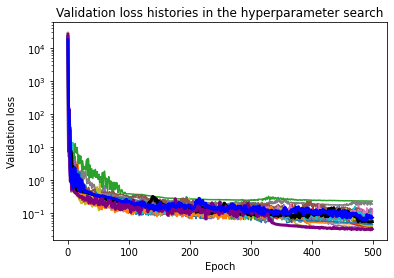

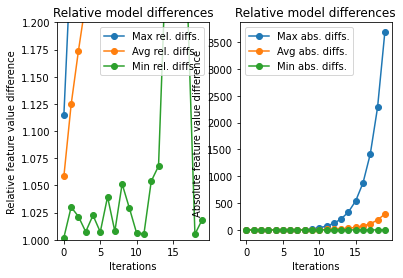

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


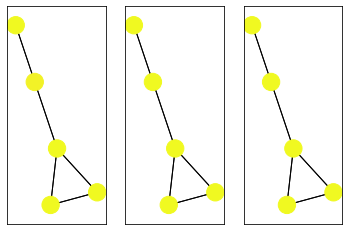

tensor([[ 1.8535,  2.2691,  4.3731],
        [ 1.6086,  3.2191, 17.2088],
        [ 1.2509,  3.3355,  6.2111],
        [ 0.9823,  4.7340,  4.5612],
        [ 1.4918,  4.1609, 13.1401]])
The ground truth model finished the run outputting this graph:


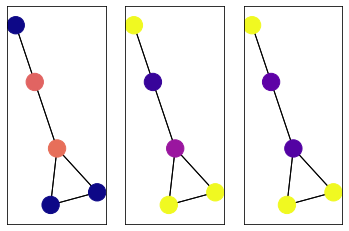

tensor([[-2.3410e+01,  6.8357e+02,  3.6887e+03],
        [-8.9407e-02,  5.1656e+00,  1.7529e+01],
        [ 6.3497e-01,  3.2981e-01,  1.4369e-01],
        [ 5.9856e-01,  8.0426e-02,  1.7187e-01],
        [-3.1767e-01,  7.8938e+00,  3.9643e+01]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                       1
loss                           0.0
score                          0.0
equation                 -0.114095
sympy_format    -0.114095144000000
Name: 0, dtype: object, complexity                      1
loss                          0.0
score                         0.0
equation                 0.116011
sympy_format    0.116010540000000
Name: 0, dtype: object], 'update_sr_result': [complexity                                                     15
loss                                                     1.524372
score                                                    0.200155
equation        ((((a2 - 1.0700171) * (xt2 / (1.0923223 - xt2)...
sympy_format    xt2*(a2 - 

In [18]:
gn_af, hps_af, model_af, sr_af = view_run_results('runs/PAPER_act_inh_full')

In [19]:
hp_stats(hps_af, gn_af)

{'final_val_loss': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.7, 0.97),
   'epochs': 500,
   1: 3,
   2: 2,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 0.03302384912967682},
 'prediction_error': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.9, 0.999),
   'epochs': 500,
   1: 3,
   2: 2,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 6.007828804850578}}

# Linear

## diff1

Stats for 20 steps for node features:
Greatest relative difference: 103.90352010726929%
Average relative difference: 101.84995412826538%
Smallest relative difference: 100.0272274017334%
Greatest absolute difference: 0.027777552604675293
Average absolute difference: 0.012956985202617944
Smallest absolute difference: 0.0001481175422668457%


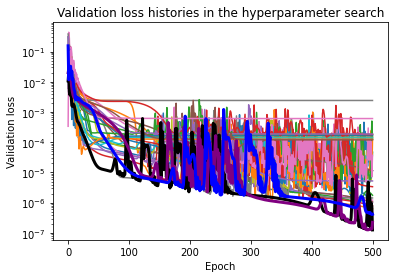

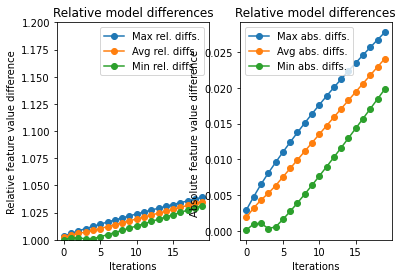

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


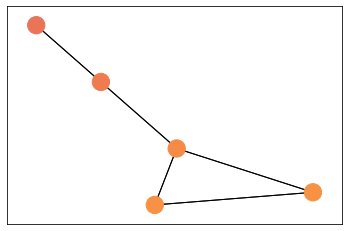

tensor([[0.7394],
        [0.7394],
        [0.7224],
        [0.6795],
        [0.6493]])
The ground truth model finished the run outputting this graph:


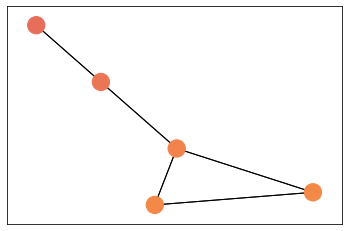

tensor([[0.7116],
        [0.7116],
        [0.6984],
        [0.6584],
        [0.6295]], grad_fn=<AddmmBackward0>)
{'message_sr_result': complexity                                                      9
loss                                                          0.0
score                                                         inf
equation        ((((xs * 1.0387459) + -0.02002364) - xt) * -0....
sympy_format    -0.80015344574048*xs + 0.7703072*xt + 0.015424...
Name: 4, dtype: object, 'update_sr_result': complexity                                                      9
loss                                                          0.0
score                                                         inf
equation        (((a + 0.007535479) * 0.9855398) + (xt * -0.12...
sympy_format     0.9855398*a - 0.12478184*xt + 0.0074265144665642
Name: 4, dtype: object, 'message_variable_order': [xt, xs], 'update_variable_order': [xt, a], 'data_trained_on': <gninvert.data_generation.TrainingData, 6 tr

In [20]:
gn1l, hps1l, model1l, sr1l = view_run_results('runs/linear_diff1')

In [21]:
hp_stats(hps1l, gn1l)

{'final_val_loss': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-06,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 50,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 1,
   2: 1,
   3: [],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 1.2625611134353676e-07},
 'prediction_error': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-06,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 50,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 1,
   2: 1,
   3: [],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.005368609447032213}}

## diff2

Stats for 20 steps for node features:
Greatest relative difference: 110.22578477859497%
Average relative difference: 104.01351630687714%
Smallest relative difference: 100.01363754272461%
Greatest absolute difference: 0.07040464878082275
Average absolute difference: 0.024799847370013596
Smallest absolute difference: 9.381771087646484e-05%


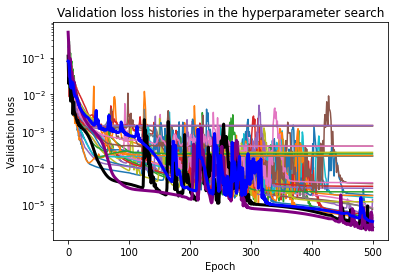

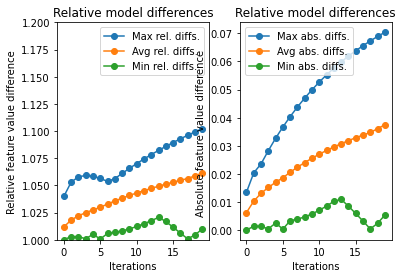

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


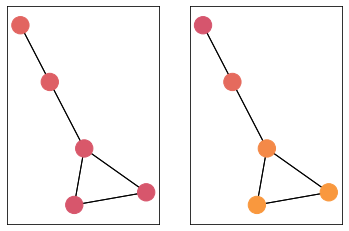

tensor([[0.5514, 0.7589],
        [0.5511, 0.7589],
        [0.5601, 0.7187],
        [0.5848, 0.6177],
        [0.6055, 0.5478]])
The ground truth model finished the run outputting this graph:


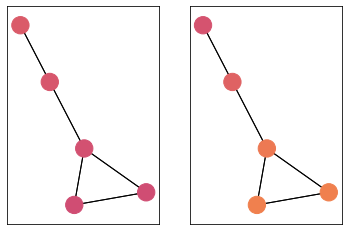

tensor([[0.5231, 0.6885],
        [0.5229, 0.6886],
        [0.5345, 0.6659],
        [0.5542, 0.5929],
        [0.5671, 0.5424]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                                                     19
loss                                                          0.0
score                                                    3.867788
equation        ((((((xs1 / 0.63832176) + (xs2 - xt2)) - (xs2 ...
sympy_format    -0.649972750419788*xs1 - 0.510499214019795*xs2...
Name: 9, dtype: object, complexity                                                     19
loss                                                          0.0
score                                                         inf
equation        ((((xt2 + -0.015547173) - (((xt1 - xs1) * 0.85...
sympy_format    -0.366106749328638*xs1 + 0.45760357*xs2 + 0.32...
Name: 9, dtype: object], 'update_sr_result': [complexity                      3
loss                     0.002065
score                 

In [22]:
gn2l, hps2l, model2l, sr2l = view_run_results('runs/linear_diff2')

In [23]:
hp_stats(hps2l, gn2l)

{'final_val_loss': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-06,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 50,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 2,
   2: 2,
   3: [],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 1.999242158490233e-06},
 'prediction_error': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-06,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 50,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 2,
   2: 2,
   3: [],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.02083600014448166}}

# Fine-tuned

## diff1

Stats for 20 steps for node features:
Greatest relative difference: 105.67388534545898%
Average relative difference: 103.18490326404573%
Smallest relative difference: 100.10987520217896%
Greatest absolute difference: 0.04122030735015869
Average absolute difference: 0.022094496199861167
Smallest absolute difference: 0.0007819533348083496%


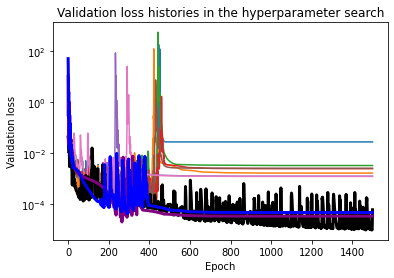

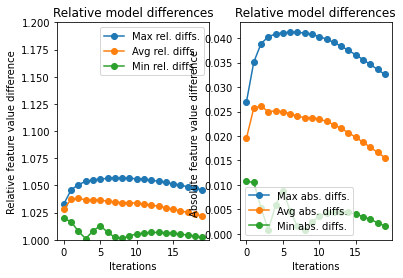

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


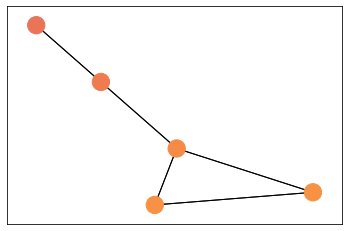

tensor([[0.7394],
        [0.7394],
        [0.7224],
        [0.6795],
        [0.6493]])
The ground truth model finished the run outputting this graph:


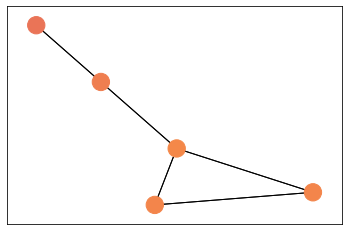

tensor([[0.7068],
        [0.7068],
        [0.7131],
        [0.6810],
        [0.6513]], grad_fn=<AddmmBackward0>)
{'message_sr_result': complexity                                  5
loss                                 0.000242
score                                1.740505
equation            ((xt - xs) * -0.24516167)
sympy_format    0.24516167*xs - 0.24516167*xt
Name: 2, dtype: object, 'update_sr_result': complexity                                                9
loss                                               0.000816
score                                              0.538951
equation        (a + ((0.5053277 - (a * 0.37709332)) * xt))
sympy_format              a + xt*(0.5053277 - 0.37709332*a)
Name: 4, dtype: object, 'message_variable_order': [xt, xs], 'update_variable_order': [xt, a], 'data_trained_on': <gninvert.data_generation.TrainingData, 6 train size / 2 validation size / shuffle False>}


In [24]:
gn1x, hps1x, model1x, sr1x = view_run_results('runs/PRECISE1_diff1')

In [25]:
hp_stats(hps1x, gn1x)

{'final_val_loss': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-05,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 1500,
   1: 1,
   2: 1,
   3: [64],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 3.390394340385683e-05},
 'prediction_error': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-05,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 1500,
   1: 1,
   2: 1,
   3: [16, 16, 16],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.03838062770664692}}

## diff2

Stats for 20 steps for node features:
Greatest relative difference: 103.01936864852905%
Average relative difference: 100.78579664230347%
Smallest relative difference: 100.00301599502563%
Greatest absolute difference: 0.018281280994415283
Average absolute difference: 0.00481766756856814
Smallest absolute difference: 1.2159347534179688e-05%


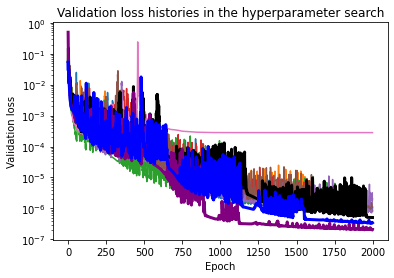

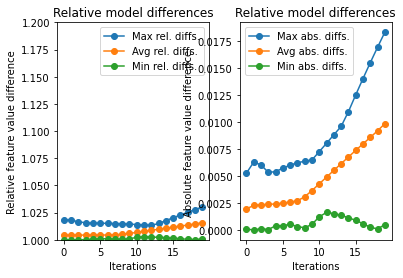

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


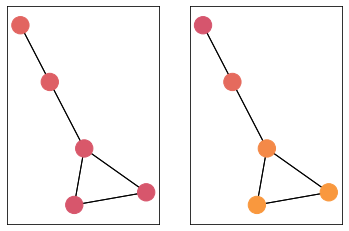

tensor([[0.5514, 0.7589],
        [0.5511, 0.7589],
        [0.5601, 0.7187],
        [0.5848, 0.6177],
        [0.6055, 0.5478]])
The ground truth model finished the run outputting this graph:


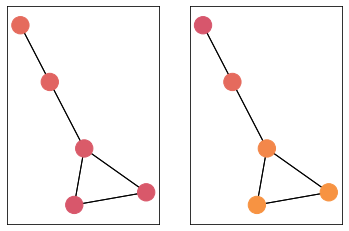

tensor([[0.5587, 0.7450],
        [0.5583, 0.7451],
        [0.5682, 0.7087],
        [0.5989, 0.6172],
        [0.6237, 0.5530]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                                                     11
loss                                                      0.00005
score                                                    2.388992
equation        (((((xs1 - xt1) * -0.46669757) + xs2) - xt2) *...
sympy_format    -0.381551048515743*xs1 + 0.81755525*xs2 + 0.38...
Name: 5, dtype: object, complexity                                                     11
loss                                                     0.000075
score                                                    2.369635
equation        ((xs1 - (xt1 + ((xt2 - xs2) * 0.5701733))) * 0...
sympy_format    0.73039186*xs1 + 0.416449937109338*xs2 - 0.730...
Name: 5, dtype: object], 'update_sr_result': [complexity                                                      9
loss                    

In [26]:
gn2x, hps2x, model2x, sr2x = view_run_results('runs/PRECISE1_diff2')

In [29]:
hp_stats(hps2x, gn2x)

{'final_val_loss': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.2,
   'lr_scheduler_patience': 75,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 1e-07,
   'epochs': 2000,
   1: 2,
   2: 2,
   3: [16],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 2.0642043807583832e-07},
 'prediction_error': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.2,
   'lr_scheduler_patience': 75,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 1e-07,
   'epochs': 2000,
   1: 2,
   2: 2,
   3: [16, 16, 16],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.002543103136122227}}